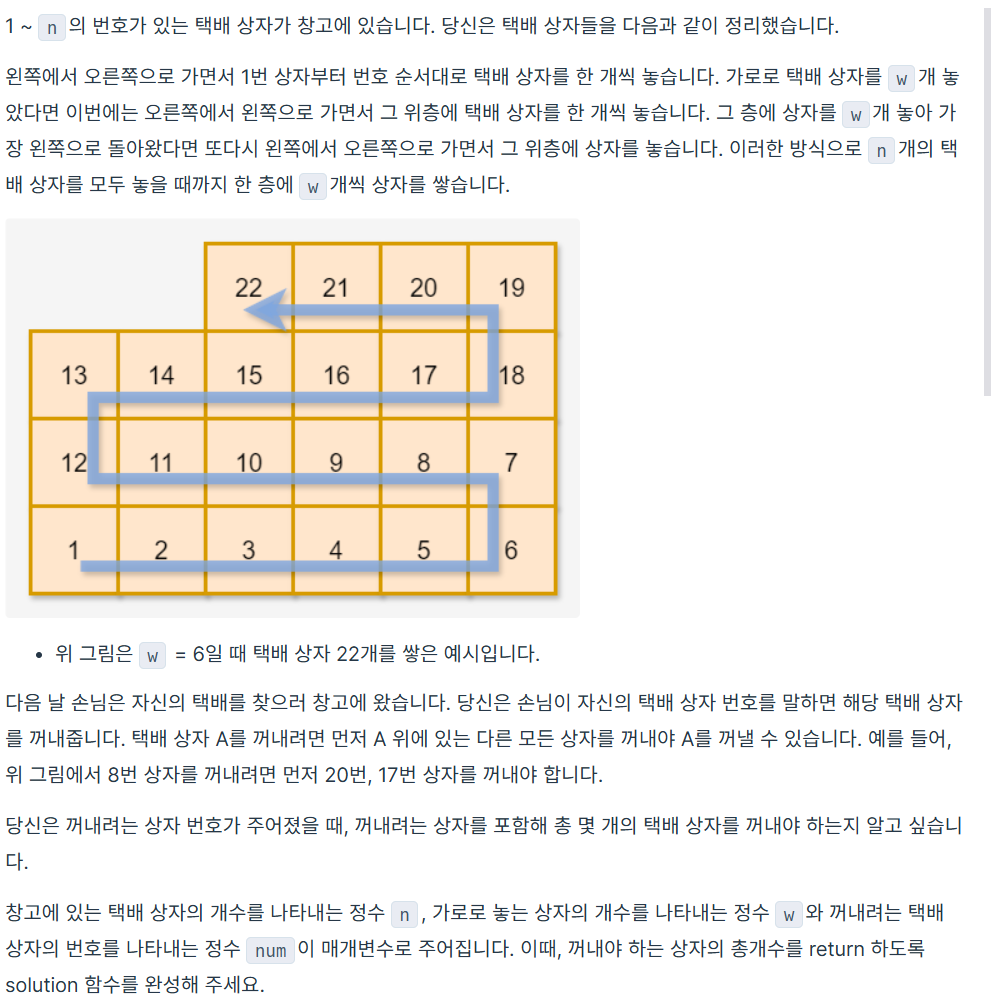

In [3]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-25 025844.png")
img

In [4]:
from collections import deque

def solution(n, w, num):
        
    if n%w==0:
        top=n//w
    else:
        top=(n//w)+1

    zero_num=int(top*w-n)
    count=1
    
    lst_in_lst=[]
    
    for _ in range(1,top+1):
    #홀
        if count%2==1:
            lst=[x for x in range(1+(count-1)*w,count*w+1)]
            lst_in_lst.append(lst)
            count+=1
    #짝
        else:
            lst=[x for x in range(1+(count-1)*w,count*w+1)]
            lst.sort(reverse=True)
            lst_in_lst.append(lst)
            count+=1
             
    if top%2==0:
        for i in range(zero_num):
            lst_in_lst[top-1][i]=0
    else:
        for i in range(zero_num):
            lst_in_lst[top-1][w-i-1]=0

#------------------- 택배 쌓기 끝-------------------    

    if num%w!=0:
        floor=(num//w)+1
    else:
        floor=(num//w)
        
    for idx,val in enumerate(lst_in_lst[floor-1]):
        if val == num:
            break
    
    if lst_in_lst[top-1][idx]!=0:
        answer=top-floor+1
    else:
        answer=top-floor
    
    return answer

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.5 / 5.0 점**

      * **평가:** **정확하게 동작하는 훌륭한 코드입니다.** "컴퓨터스럽게 풀어보겠다"는 의도에 맞게, 택배가 쌓이는 전체 과정을 2차원 리스트로 완벽하게 시뮬레이션했습니다. 로직이 복잡함에도 불구하고 지그재그 패턴, 빈칸 처리, 최종 답 계산까지 모든 단계를 꼼꼼하게 구현해내신 점이 매우 뛰어납니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 정확한 시뮬레이션 로직을 그대로 유지하면서, 가독성과 재사용성을 높이기 위해 코드를 여러 개의 작은 함수로 분리하고, 일부 계산을 더 Pythonic하게 다듬은 버전입니다.

-----

### \#\# Gemini 추천 코드 (구조 개선 버전)

사용자님의 로직을 더 읽기 쉽고 관리하기 편하도록 여러 함수로 나눈 버전입니다.

```python
def build_layout(n, w):
    """택배가 쌓인 2D 레이아웃을 생성하는 함수"""
    if n == 0:
        return [], 0

    total_floors = (n - 1) // w + 1
    layout = []
    
    for floor_num in range(1, total_floors + 1):
        start = (floor_num - 1) * w + 1
        end = floor_num * w + 1
        row = list(range(start, end))
        
        if floor_num % 2 == 0: # 짝수 층은 역순
            row.reverse()
        layout.append(row)

    # 마지막 층의 빈 공간을 0으로 채우기
    empty_slots = total_floors * w - n
    if empty_slots > 0:
        last_floor = layout[-1]
        if total_floors % 2 == 0: # 짝수 층은 앞에서부터 0
            for i in range(empty_slots):
                last_floor[i] = 0
        else: # 홀수 층은 뒤에서부터 0
            for i in range(empty_slots):
                last_floor[w - 1 - i] = 0
                
    return layout, total_floors

def find_coords(layout, w, num):
    """특정 택배의 층과 칸(인덱스)을 찾는 함수"""
    floor_idx = (num - 1) // w
    row = layout[floor_idx]
    
    try:
        col_idx = row.index(num)
        return floor_idx, col_idx
    except ValueError:
        return -1, -1 # 찾지 못한 경우

def solution(n, w, num):
    # 1. 시뮬레이션을 통해 택배 레이아웃을 생성
    layout, total_floors = build_layout(n, w)
    if not layout:
        return 0

    # 2. 원하는 택배의 좌표(층, 칸)를 찾음
    my_floor_idx, my_col_idx = find_coords(layout, w, num)

    # 3. 내 택배 바로 위부터 꼭대기까지의 택배 수를 계산
    packages_above = 0
    for floor_to_check in range(my_floor_idx + 1, total_floors):
        if layout[floor_to_check][my_col_idx] != 0:
            packages_above += 1
            
    # 내 택배(1) + 내 위 택배 수
    return 1 + packages_above
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **매우 훌륭합니다.** 시뮬레이션 접근법은 이 문제의 모든 규칙(지그재그, 빈칸)을 가장 정확하게 반영할 수 있는 확실한 방법입니다. 시간 복잡도 O(N)으로, 문제의 제약 조건 내에서 충분히 효율적입니다. 알고리즘 선택과 구현 모두 완벽합니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **내 풀이:** `floor`를 계산하는 `if/else` 구문은 정확하지만, 약간 더 간결하게 표현할 수 있습니다.
  * **배울 점:** `(num - 1) // w` (0부터 시작하는 층 인덱스) 또는 `(num - 1) // w + 1` (1부터 시작하는 층 번호) 처럼, 1부터 시작하는 번호를 0부터 시작하는 인덱스로 바꿔서 계산하면 `if/else` 분기 없이 한 줄로 깔끔하게 처리할 수 있습니다.

-----

### \#\# 3. 또 다른 측면: 함수의 역할과 책임 (SRP)

이번 코드에서 논의할 수 있는 가장 중요한 부분은 \*\*단일 책임 원칙(Single Responsibility Principle)\*\*입니다. 하나의 함수는 하나의 책임만 져야 한다는 원칙이죠.

  * **사용자님의 코드:** 하나의 `solution` 함수 안에서 ①레이아웃 생성, ②좌표 찾기, ③답 계산이라는 세 가지 큰 책임을 모두 수행하고 있습니다.
  * **추천 코드:** 이 책임들을 각각 `build_layout`, `find_coords`, `solution` 함수로 명확하게 분리했습니다.

이렇게 코드를 분리하면 다음과 같은 장점이 있습니다.

  * **가독성:** `solution` 함수만 읽어도 "아, 레이아웃 만들고, 좌표 찾고, 답 계산하는구나" 하고 전체 흐름을 쉽게 파악할 수 있습니다.
  * **재사용성:** 만약 다른 곳에서 택배 레이아웃만 필요하다면, `build_layout` 함수만 가져다 쓸 수 있습니다.
  * **디버깅:** 만약 좌표 찾기에서 문제가 생긴다면, 다른 코드는 볼 필요 없이 `find_coords` 함수만 집중적으로 살펴보면 됩니다.

복잡한 문제를 해결할 때, 이처럼 **기능 단위로 함수를 나누는 습관**은 코드를 훨씬 더 깨끗하고 관리하기 쉽게 만들어주는 매우 중요한 기술입니다.